In [1]:
library(data.table)
library(ggplot2)

Warning message:
“package ‘data.table’ was built under R version 4.1.1”


In [3]:
d = fread("pigz -cd ~/git/singlem-wdl/sra_bigquery_attributes/sra_metadata_20210922.csv.gz |sed 's/\\\\\"//g'",header=F)[,.(run_id=V2,attribute_name=V4,attribute_value=V6)]
dim(d)
d[1:3]

[1] 11150617        3

run_id,attribute_name,attribute_value
<chr>,<chr>,<chr>
SRR4010989,acc,SRR4010989
SRR4010989,assay_type,WCS
SRR4010989,center_name,"UNIVERSITY OF ZURICH, VETSUISSE FACULTY"


In [34]:
d[grep('oxy',attribute_name),data.table(table(attribute_name))][order(-N)]

attribute_name,N
<chr>,<int>
rel_to_oxygen_sam.0,4244
oxygen_sensor_sam,3227
diss_oxygen_sam.0,531
oxygen_sam,303
oxy_stat_samp_sam.0,222
dissolved_oxygen_sam.0,155
dissolved_oxygen_____sam,130
oxygenation_status_of_sample_sam,115
chem_oxygen_dem_sam,100


run_id,attribute_name,attribute_value
<chr>,<chr>,<chr>
ERR315857,oxygen_sensor_sam,99999
ERR2762170,oxygen_sensor_sam,353.31105
ERR4691842,oxygen_sensor_sam,205.2885


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



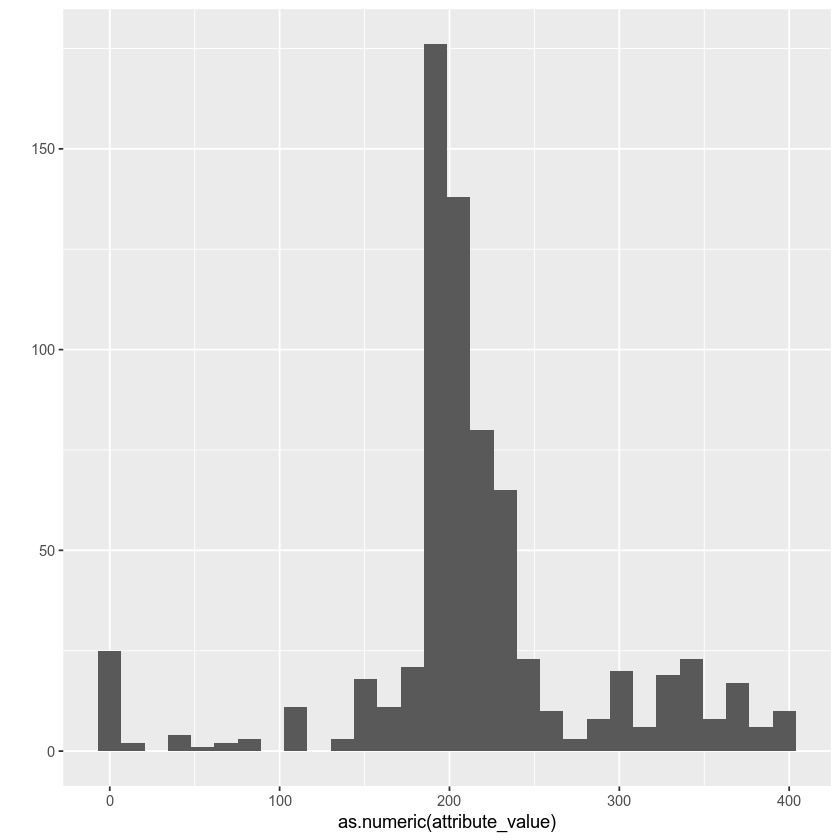

In [32]:
d[attribute_name=='oxygen_sensor_sam'][1:3]
qplot(data=d[attribute_name=='oxygen_sensor_sam' & attribute_value!='99999'], as.numeric(attribute_value))

In [40]:
d[attribute_name=='rel_to_oxygen_sam.0',data.table(table(attribute_value))][order(-N)]

attribute_value,N
<chr>,<int>
anaerobe,1736
aerobe,1042
missing,464
not applicable,426
facultative,314
microaerophilic,87
not collected,61
obligate anaerobe,31
not available,25


In [53]:
d[attribute_value=='obligate aerobe']
d[attribute_value=='aerobe']

run_id,attribute_name,attribute_value
<chr>,<chr>,<chr>
SRR4822771,rel_to_oxygen_sam.0,obligate aerobe


run_id,attribute_name,attribute_value
<chr>,<chr>,<chr>
SRR10090781,rel_to_oxygen_sam.0,aerobe
SRR8451832,rel_to_oxygen_sam.0,aerobe
SRR3098772,rel_to_oxygen_sam.0,aerobe
SRR3098764,rel_to_oxygen_sam.0,aerobe
SRR3747847,rel_to_oxygen_sam.0,aerobe
SRR8504037,rel_to_oxygen_sam.0,aerobe
SRR6747753,rel_to_oxygen_sam.0,aerobe
SRR7825336,rel_to_oxygen_sam.0,aerobe
SRR11921716,rel_to_oxygen_sam.0,aerobe


In [45]:
m = merge(d[attribute_name=='organism'],d[attribute_name=='oxygen_sensor_sam' & attribute_value!='99999'],by='run_id')

In [51]:
data.table(table(m$attribute_value.x))

V1,N
<chr>,<int>
marine metagenome,3005


In [52]:
data.table(table(d[attribute_name=='organism']$attribute_value))[order(-N)]

V1,N
<chr>,<int>
human gut metagenome,58560
Homo sapiens,25850
gut metagenome,24981
human metagenome,22153
metagenome,21414
marine metagenome,12445
soil metagenome,9000
mouse gut metagenome,6865
feces metagenome,5324
